# Are 50$^\circ$ days within historical norms for weather in Chicago?

The goal of this notebook is to determine the context for the forecast for 50$^\circ$ weather in Chicago this coming weekend.  I have the hourly weather data going back to 1979 for my zipcode, 60608, Chicago's Lower West Side.  Some summary stats is all we need.

There are a few empty rows to start the data, so I'll remove those.

In [2]:
dat.20 <-  read.csv(file = getObjectStorageFileWithCredentials_e838995faea74efb9e5d3d12f14ee83b("WeatherForecasting", "weather60608_1979_00.csv"))
dim(dat.20)
head(dat.20)

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



[1] 193032     20

dateHrGmt,dateHrLwt,surfaceTemperatureFahrenheit,surfaceDewpointTemperatureFahrenheit,surfaceWetBulbTemperatureFahrenheit,relativeHumidityPercent,surfaceAirPressureMillibars,windSpeedMph,windDirectionDegrees,cloudCoveragePercent,precipitationPreviousHourInches,directNormalIrradianceWsqm,downwardSolarRadiationWsqm,diffuseHorizontalRadiationWsqm,windChillTemperatureFahrenheit,apparentTemperatureFahrenheit,snowfallInches,heatIndexFahrenheit,mslPressureMillibars,surfaceWindGustsMph
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dat.20 <- dat.20[-which(dat.20$dateHrGmt == 0),]
head(dat.20)

,dateHrGmt,dateHrLwt,surfaceTemperatureFahrenheit,surfaceDewpointTemperatureFahrenheit,surfaceWetBulbTemperatureFahrenheit,relativeHumidityPercent,surfaceAirPressureMillibars,windSpeedMph,windDirectionDegrees,cloudCoveragePercent,precipitationPreviousHourInches,directNormalIrradianceWsqm,downwardSolarRadiationWsqm,diffuseHorizontalRadiationWsqm,windChillTemperatureFahrenheit,apparentTemperatureFahrenheit,snowfallInches,heatIndexFahrenheit,mslPressureMillibars,surfaceWindGustsMph
169,01/08/1979 00:00:00,01/07/1979 18:00:00,5.2,4.8,5.1,99,999,12.9,302,86,0,0,0,0,-11.6,-11.6,0,5.2,1025,30.6
170,01/08/1979 01:00:00,01/07/1979 19:00:00,3.5,3.2,3.5,99,997,13.2,300,61,0,0,0,0,-13.8,-13.8,0,3.5,1024,33.0
171,01/08/1979 02:00:00,01/07/1979 20:00:00,2.0,1.8,2.0,99,998,12.4,292,54,0,0,0,0,-15.2,-15.2,0,2.0,1024,33.4
172,01/08/1979 03:00:00,01/07/1979 21:00:00,0.8,0.5,0.7,99,997,12.4,294,74,0,0,0,0,-16.8,-16.8,0,0.8,1024,33.0
173,01/08/1979 04:00:00,01/07/1979 22:00:00,-0.3,-0.6,-0.4,99,998,12.1,292,69,0,0,0,0,-18.0,-18.0,0,-0.3,1024,32.6
174,01/08/1979 05:00:00,01/07/1979 23:00:00,-1.3,-1.5,-1.3,99,998,12.2,292,79,0,0,0,0,-19.3,-19.3,0,-1.3,1024,32.1


And this file ended at the millenium.  So I read in the other.

In [4]:
dim(dat.20)
tail(dat.20)

[1] 192696     20

,dateHrGmt,dateHrLwt,surfaceTemperatureFahrenheit,surfaceDewpointTemperatureFahrenheit,surfaceWetBulbTemperatureFahrenheit,relativeHumidityPercent,surfaceAirPressureMillibars,windSpeedMph,windDirectionDegrees,cloudCoveragePercent,precipitationPreviousHourInches,directNormalIrradianceWsqm,downwardSolarRadiationWsqm,diffuseHorizontalRadiationWsqm,windChillTemperatureFahrenheit,apparentTemperatureFahrenheit,snowfallInches,heatIndexFahrenheit,mslPressureMillibars,surfaceWindGustsMph
192859,12/31/2000 18:00:00,12/31/2000 12:00:00,25.6,23.4,24.9,91,1001,8.8,324,100,0.000,323,299,163,16.6,16.6,0,25.6,1026,22.6
192860,12/31/2000 19:00:00,12/31/2000 13:00:00,24.8,21.9,23.8,89,1001,6.3,314,100,0.001,176,282,209,17.3,17.3,0,24.8,1026,20.4
192861,12/31/2000 20:00:00,12/31/2000 14:00:00,24.7,21.9,23.8,89,1001,6.9,306,99,0.000,142,226,173,16.8,16.8,0,24.7,1026,20.2
192862,12/31/2000 21:00:00,12/31/2000 15:00:00,24.4,22.1,23.6,91,1001,7.1,303,100,0.001,76,134,113,16.3,16.3,0,24.4,1026,19.9
192863,12/31/2000 22:00:00,12/31/2000 16:00:00,23.6,21.2,22.8,91,1001,6.7,311,99,0.001,0,37,37,15.6,15.6,0,23.6,1027,19.7
192864,12/31/2000 23:00:00,12/31/2000 17:00:00,22.8,20.3,22.0,90,1002,6.6,317,99,0.001,0,0,0,14.7,14.7,0,22.8,1027,19.4


In [5]:
dat.21 <-  read.csv(file = getObjectStorageFileWithCredentials_e838995faea74efb9e5d3d12f14ee83b("WeatherForecasting", "weather60608_2000_16.csv"))
dat.21 <- dat.21[-which(dat.21$dateHrGmt == 0),]
head(dat.21)

dateHrGmt,dateHrLwt,surfaceTemperatureFahrenheit,surfaceDewpointTemperatureFahrenheit,surfaceWetBulbTemperatureFahrenheit,relativeHumidityPercent,surfaceAirPressureMillibars,windSpeedMph,windDirectionDegrees,cloudCoveragePercent,precipitationPreviousHourInches,directNormalIrradianceWsqm,downwardSolarRadiationWsqm,diffuseHorizontalRadiationWsqm,windChillTemperatureFahrenheit,apparentTemperatureFahrenheit,snowfallInches,heatIndexFahrenheit,mslPressureMillibars,surfaceWindGustsMph
01/01/2001 00:00:00,12/31/2000 18:00:00,22.5,20.1,21.8,90,1002,6.4,323,99,0.000,0,0,0,14.6,14.6,0,22.5,1027,19.1
01/01/2001 01:00:00,12/31/2000 19:00:00,20.4,17.8,19.7,90,1003,2.7,356,100,0.001,0,0,0,20.4,20.4,0,20.4,1028,16.8
01/01/2001 02:00:00,12/31/2000 20:00:00,19.9,17.2,19.2,90,1003,3.6,333,99,0.000,0,0,0,14.6,14.6,0,19.9,1028,16.5
01/01/2001 03:00:00,12/31/2000 21:00:00,19.6,16.9,18.9,89,1003,4.2,325,99,0.000,0,0,0,13.4,13.4,0,19.6,1028,16.4
01/01/2001 04:00:00,12/31/2000 22:00:00,19.8,17.2,19.1,89,1003,4.1,322,99,0.001,0,0,0,13.9,13.9,0,19.8,1028,16.1
01/01/2001 05:00:00,12/31/2000 23:00:00,20.3,17.6,19.5,89,1003,4.3,324,99,0.001,0,0,0,14.2,14.2,0,20.3,1029,16.2


Put the data together.

In [6]:
dat <- rbind(dat.20, dat.21)

In [7]:
head(dat[, c("dateHrLwt", "surfaceTemperatureFahrenheit")])

,dateHrLwt,surfaceTemperatureFahrenheit
169,01/07/1979 18:00:00,5.2
170,01/07/1979 19:00:00,3.5
171,01/07/1979 20:00:00,2.0
172,01/07/1979 21:00:00,0.8
173,01/07/1979 22:00:00,-0.3
174,01/07/1979 23:00:00,-1.3


In [8]:
# install.packages("lubridate")
library(lubridate)


Attaching package: ‘lubridate’

The following objects are masked from ‘package:SparkR’:

    hour, minute, month, quarter, second, year

The following object is masked from ‘package:base’:

    date



Make dateHrGmt readable by lubridate

In [9]:
datetime <- lubridate::mdy_hms(as.character(dat$dateHrGmt))

Determine percentiles of January temperature and percentage of +50 degree hours

0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
-22.1,-7.5,-3.2,-0.5,1,2.3,3.5,4.5,5.5,6.5,...,37.6,38.1,38.9,39.7,40.6,41.8,43.4,45.7,48.7,59.4


[1] 0.008093017

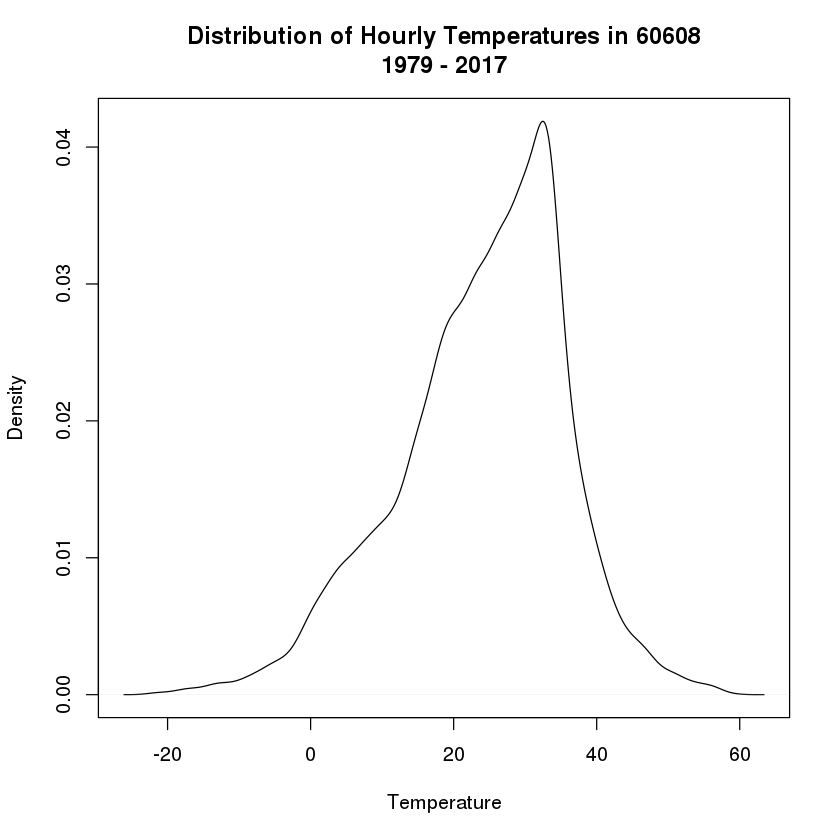

In [10]:
jan.ind <- which(month(datetime) == 1)
t(quantile(dat[jan.ind, "surfaceTemperatureFahrenheit"], seq(0, 1, .01)))
length(which(dat[jan.ind, "surfaceTemperatureFahrenheit"] > 50))/length(jan.ind)
plot(density(dat[jan.ind, "surfaceTemperatureFahrenheit"]), xlab = "Temperature", main = "Distribution of Hourly Temperatures in 60608\n1979 - 2017")

In [11]:
FiftyplusYearCount <- table(year(datetime[jan.ind[which(dat[jan.ind, "surfaceTemperatureFahrenheit"] > 50)]]))

In [12]:
FPYC <- data.frame(Year = 1979:2017, Count = 0)
FPYC[which(1979:2017 %in% as.numeric(names(FiftyplusYearCount))), "Count"] <- FiftyplusYearCount

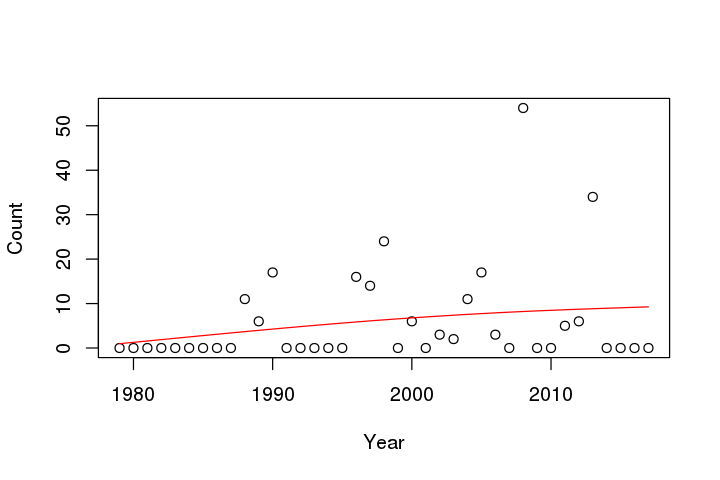

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
plot(FPYC)
lines(smooth.spline(FPYC), col = 2)

# Conclusion

In summary, by going back 38 years, we see the the extremely warm weather in the 60608 is on the rise in January.
10 hours of 50$^\circ$ weather in January is now the norm, not the exception.